# feture engineering


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create dataframe  to read dataset
df = pd.read_csv('hr_employee_churn_data.csv')

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [6]:
df1.drop(['empid'] , axis = 1 , inplace = True)

In [7]:
df1.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [8]:
df1['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [9]:
df1['satisfaction_level'].fillna(df1['satisfaction_level'].mean(),inplace = True)

In [10]:
df1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [11]:
df1['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
salary_dummies = pd.get_dummies(df1['salary'],drop_first = True)

In [13]:
salary_dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [14]:
df1 = pd.concat([df1,salary_dummies],axis = 1)

In [15]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [16]:
df1.drop(['salary'],axis = 1,inplace = True)

In [17]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


# split Dataset into traininng and test set


In [18]:
#split dataset ointo feature and label
x = df1.drop(labels = 'left',axis = 1)
y =df1['left']

In [19]:
#spliting  train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [20]:
len(x_train)

11999

In [21]:
len(x_test)

3000

# model selection

In [22]:
# hyper parameter tuning%pip install xgboost
%pip install xgboost
#will try to use below two models that are randomforest  classifier and xgboost classifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


Note: you may need to restart the kernel to use updated packages.


In [23]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [24]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
    

In [25]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9221967767033457,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9902661776147605,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

# Model Building

In [26]:
# as per results xgboost givess best result and hence selecting same to model
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)


In [27]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [29]:
model_xgb.score(x_test,y_test)


0.9923333333333333

In [30]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1
13378,0.55,0.96,3,194,3,0,0,0,1
10233,0.72,0.67,5,210,2,0,0,0,1
4719,0.96,0.75,4,177,2,0,0,1,0
7003,0.96,0.54,3,198,3,0,0,1,0


In [31]:
x_test[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
1670,0.44,0.57,2,141,3,0,0,0,1


In [32]:
model_xgb.predict(x_test[:1])

array([1])

In [33]:
df1.loc[1670]

satisfaction_level         0.44
last_evaluation            0.57
number_project             2.00
average_montly_hours     141.00
time_spend_company         3.00
Work_accident              0.00
promotion_last_5years      0.00
left                       1.00
low                        0.00
medium                     1.00
Name: 1670, dtype: float64

In [35]:
#confution matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(x_test))
cm

array([[2292,    7],
       [  16,  685]], dtype=int64)

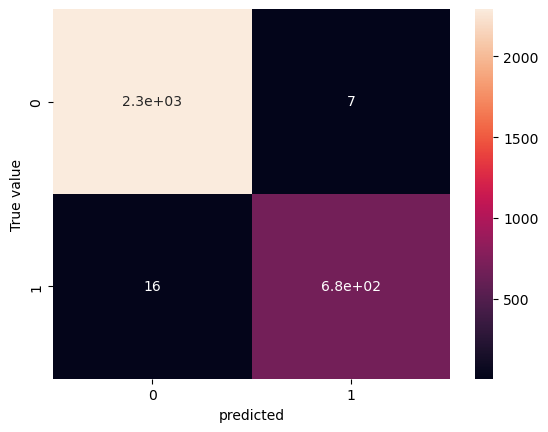

In [37]:
# plot the graph
from matplotlib import pyplot  as plt
import seaborn as sns
sns.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('True value')
plt.show()